<a href="https://colab.research.google.com/github/33Martin22/Eye-Disease-Classification-using-CNN/blob/main/Eye_Diseases_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Downloading the dataset from Kaggle
import kagglehub
gunavenkatdoddi_eye_diseases_classification_path = kagglehub.dataset_download('gunavenkatdoddi/eye-diseases-classification')

print('Data source import complete.')


Using Colab cache for faster access to the 'eye-diseases-classification' dataset.
Data source import complete.


<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Import Needed Libraries</h2>
</div>

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Reading Dataset And Get Info</h2>
</div>

#### Define Constraints

In [ ]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
CHANNELS = 3

#### Load The Data

In [ ]:
dataset_folder_path = os.path.join(gunavenkatdoddi_eye_diseases_classification_path, 'dataset')
Class_Names = os.listdir(dataset_folder_path)
Class_Names_Dict = {name:idx for idx,name in enumerate(Class_Names)}
print(Class_Names_Dict)

{'glaucoma': 0, 'normal': 1, 'diabetic_retinopathy': 2, 'cataract': 3}


In [ ]:
def Load_Data():
    dataset_path_root = gunavenkatdoddi_eye_diseases_classification_path
    dataset = os.path.join(dataset_path_root, 'dataset')

    Images = []
    Labels = []

    for folder in os.listdir(dataset):
        print(f"Load Images from {folder} File")
        for file in tqdm(os.listdir(os.path.join(dataset,folder))):
            image_path = os.path.join(os.path.join(dataset,folder),file)
            image = cv2.imread(image_path)
            image = cv2.resize(image , IMAGE_SIZE)
            image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

            Images.append(image)
            Labels.append(Class_Names_Dict[folder])


    Images = np.array(Images , dtype='float32')
    Labels = np.array(Labels , dtype='int32')

    return (Images , Labels)

Images , Labels = Load_Data()

Load Images from glaucoma File


100%|██████████| 1007/1007 [00:15<00:00, 65.57it/s]


Load Images from normal File


100%|██████████| 1074/1074 [00:08<00:00, 127.37it/s]


Load Images from diabetic_retinopathy File


100%|██████████| 1098/1098 [00:09<00:00, 121.95it/s]


Load Images from cataract File


100%|██████████| 1038/1038 [00:15<00:00, 68.84it/s]


#### Shuffle The Images

In [ ]:
Images , Labels = shuffle(Images , Labels , random_state=42)

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">EDA of Images and Get Insights</h2>
</div>

#### Number of Images

In [ ]:
print(f"Number of Total Images {Images.shape[0]}")
print(f"Size of Images {IMAGE_SIZE}")

Number of Total Images 4217
Size of Images (224, 224)


In [ ]:
Train_Images , dummy_Images , Train_Labels , dummy_Labels = train_test_split(Images , Labels , test_size=0.3, random_state=42, stratify=Labels)
Val_Images , Test_Images , Val_Labels , Test_Labels = train_test_split(dummy_Images , dummy_Labels , test_size=0.5, random_state=42, stratify=dummy_Labels)

In [ ]:
print(f"Number of Train Images {Train_Images.shape}")
print(f"Number of Train Labels {Train_Labels.shape}")
print(f"Number of Validation Images {Val_Images.shape}")
print(f"Number of Validation Labels {Val_Labels.shape}")
print(f"Number of Test Images {Test_Images.shape}")
print(f"Number of Test Labels {Test_Labels.shape}")

Number of Train Images (2951, 224, 224, 3)
Number of Train Labels (2951,)
Number of Validation Images (633, 224, 224, 3)
Number of Validation Labels (633,)
Number of Test Images (633, 224, 224, 3)
Number of Test Labels (633,)


In [ ]:
_ , train_counts = np.unique(Train_Labels , return_counts=True)
_ , val_counts = np.unique(Val_Labels , return_counts=True)
_ , test_counts = np.unique(Test_Labels , return_counts=True)

df = pd.DataFrame({
    'Train': train_counts,'Validation': val_counts, 'Test': test_counts
}, index=Class_Names)

df

Train  Validation  Test
glaucoma                705         151   151
normal                  752         161   161
diabetic_retinopathy    768         165   165
cataract                726         156   156

<Figure size 1000x600 with 0 Axes>

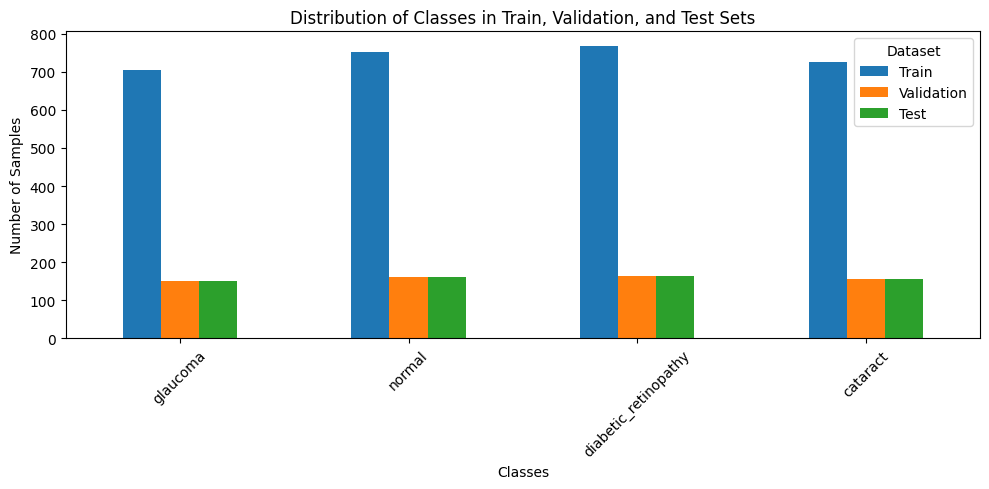

In [ ]:
plt.figure(figsize=(10, 6))
df.plot(kind='bar',figsize=(10,5))
plt.title('Distribution of Classes in Train, Validation, and Test Sets')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

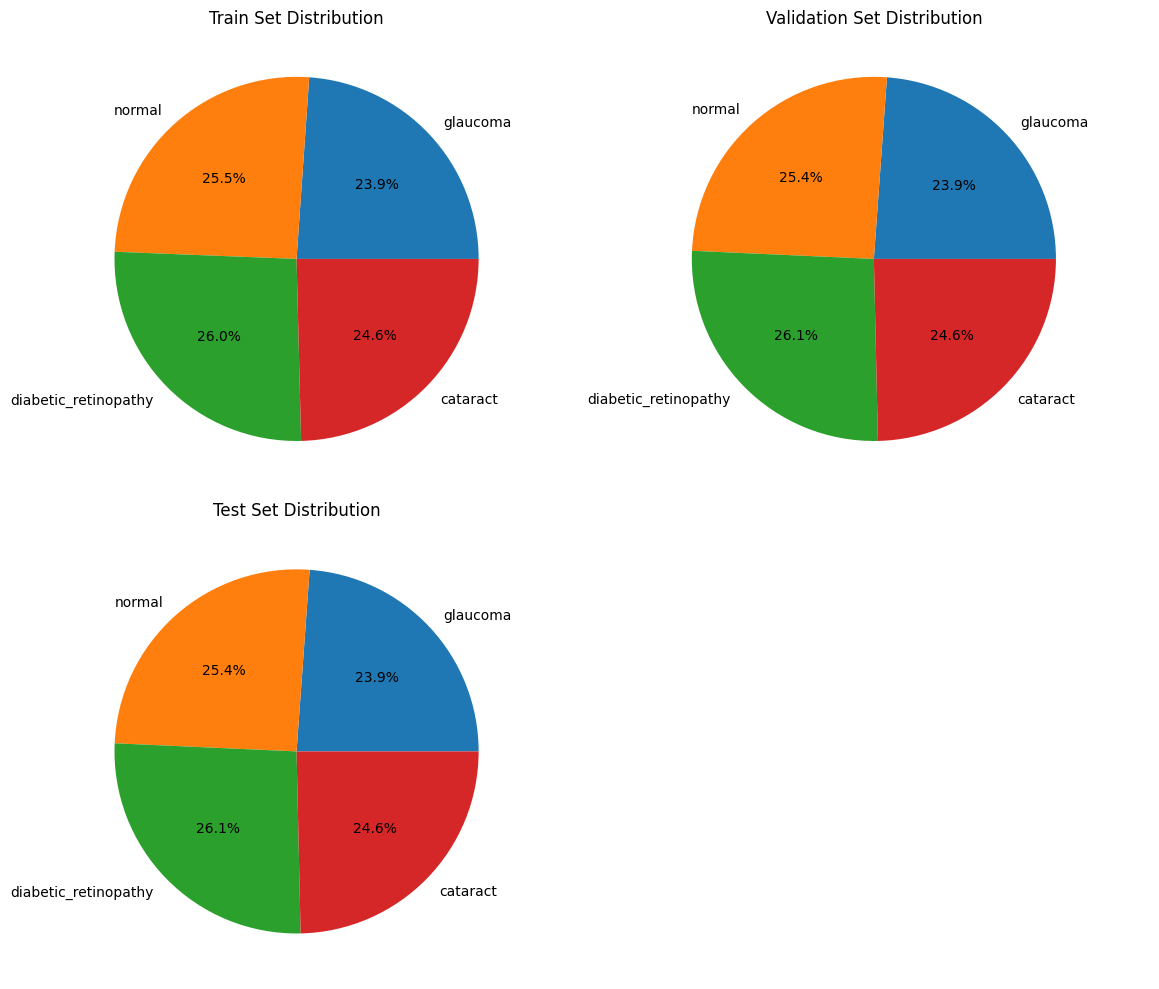

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

df.plot.pie(y='Train', autopct='%1.1f%%', title='Train Set Distribution', ax=axs[0,0], legend=False, ylabel='')
df.plot.pie(y='Validation', autopct='%1.1f%%', title='Validation Set Distribution', ax=axs[0,1], legend=False, ylabel='')
df.plot.pie(y='Test', autopct='%1.1f%%', title='Test Set Distribution', ax=axs[1,0], legend=False, ylabel='')

axs[1,1].axis('off')

plt.tight_layout()
plt.show()

#### Images In Dataset

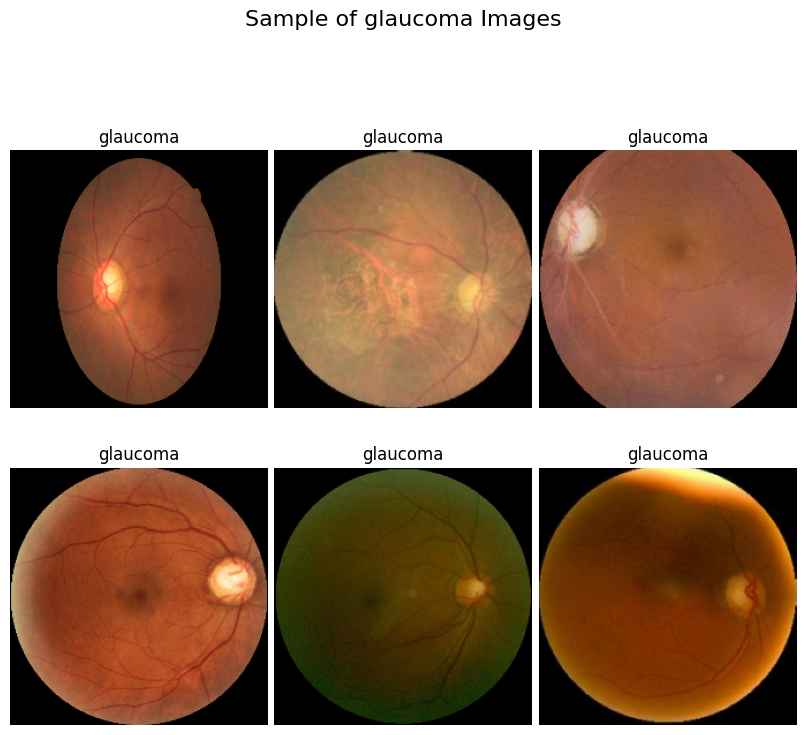

In [ ]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[0]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 0)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off')  # Hide axis for cleaner look
    plt.title(f'{Class_Names[0]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88)  # Adjust top to fit the suptitle
plt.show()

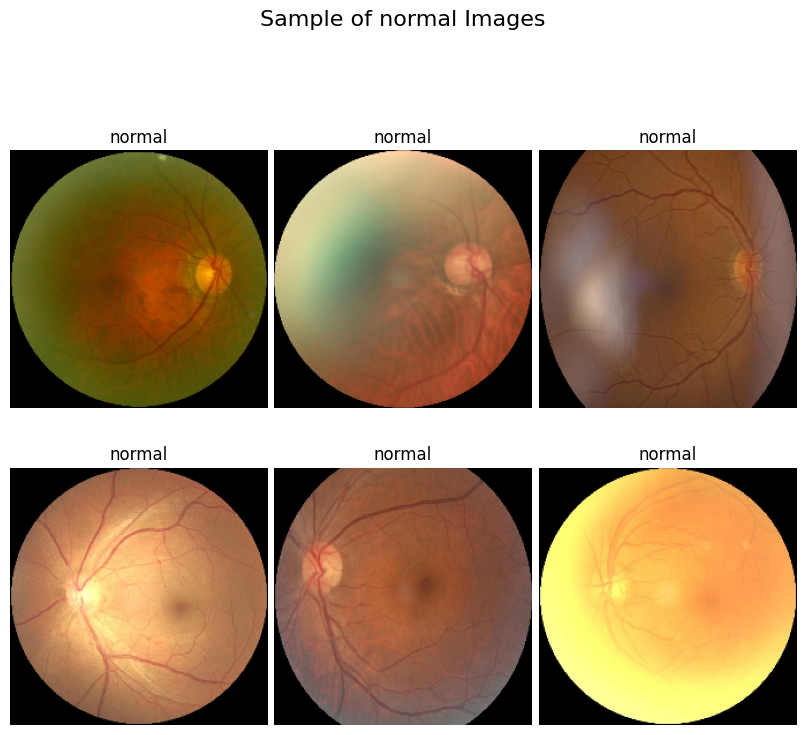

In [ ]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[1]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 1)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off')
    plt.title(f'{Class_Names[1]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88)
plt.show()

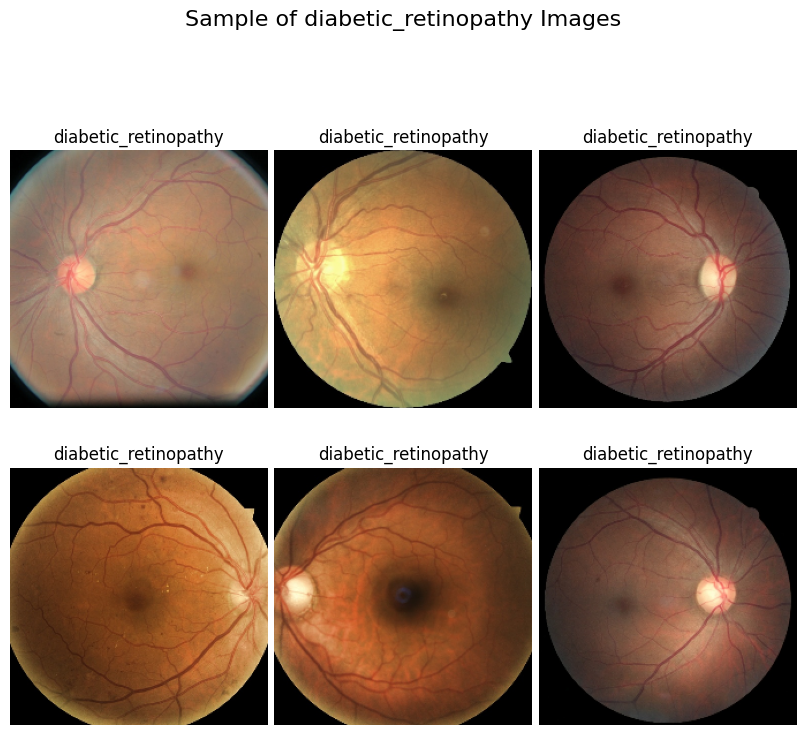

In [ ]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[2]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 2)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off')
    plt.title(f'{Class_Names[2]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88)
plt.show()

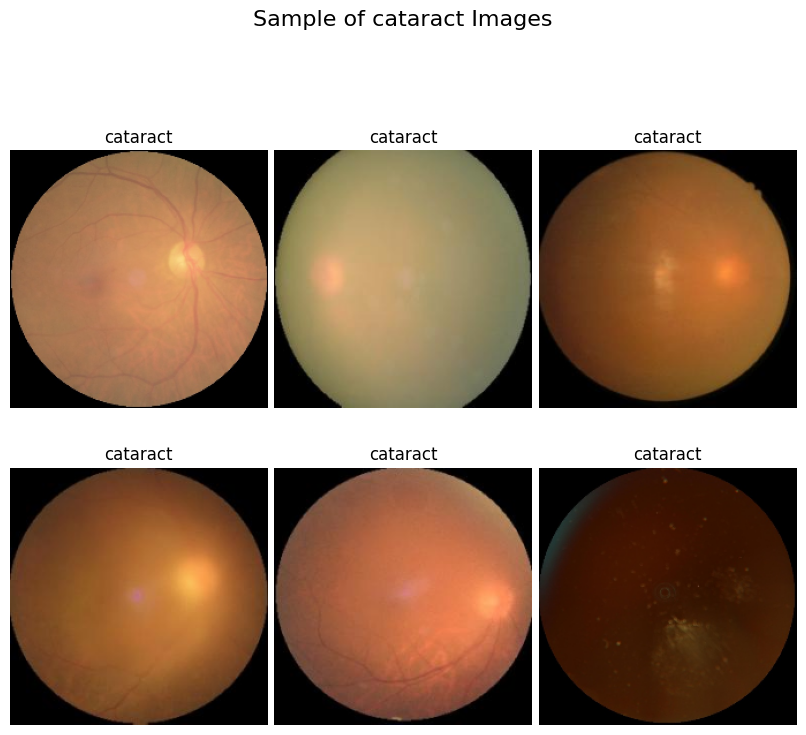

In [ ]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[3]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 3)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off')
    plt.title(f'{Class_Names[3]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88)
plt.show()

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Model Custom CNN</h2>
</div>

#### Build Custom CNN

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   )

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x=Train_Images,
    y=Train_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

val_generator = val_datagen.flow(x=Val_Images,
    y=Val_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_generator = test_datagen.flow(x=Test_Images,
    y=Test_Labels,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

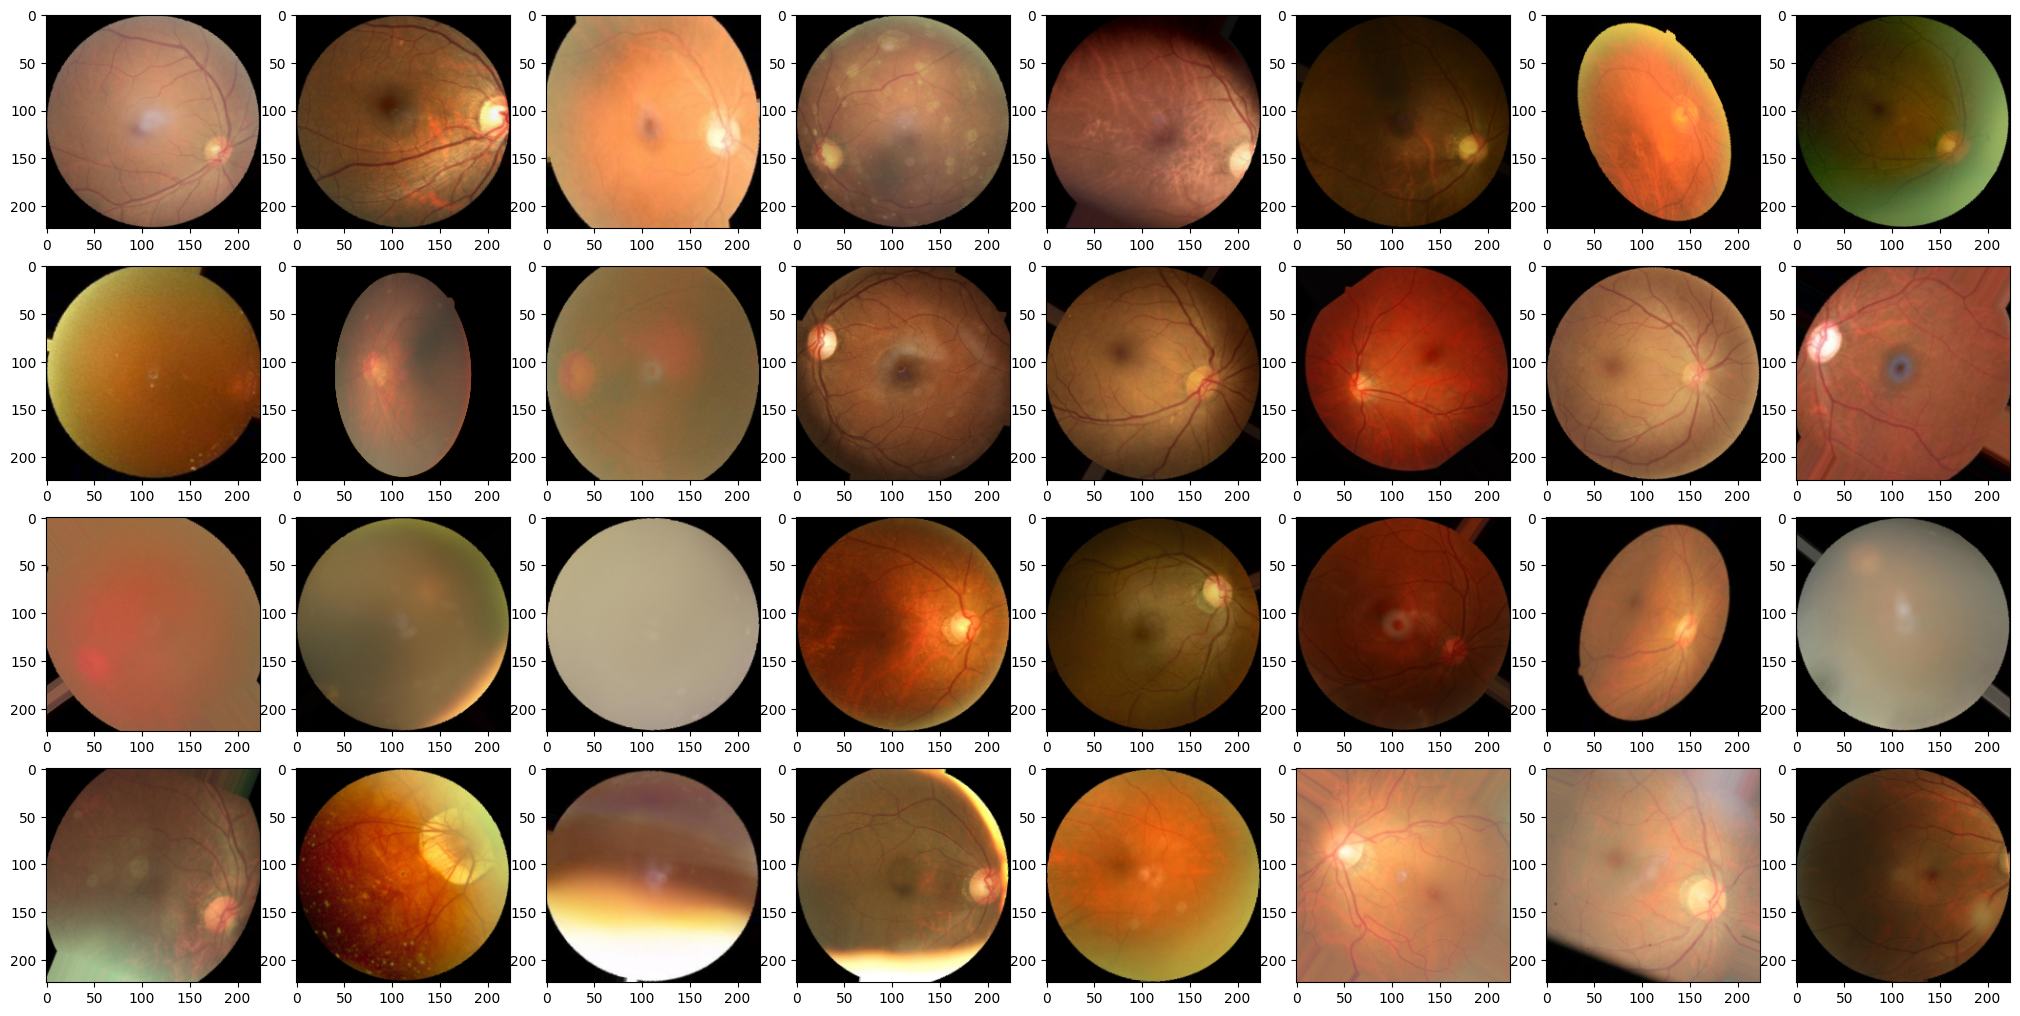

In [ ]:
for x , y in train_generator:
    plt.figure(figsize=(20,20))
    for i in range(32):
        plt.subplot(8,8,i+1)
        plt.imshow(x[i])
        plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)
    break

In [ ]:
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], CHANNELS)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(4, activation='softmax')
])

In [ ]:
KerasModel.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
best_model_callback = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

history = KerasModel.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[
        early_stopping_callback,
        best_model_callback,
        learning_rate_reduction
    ])

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.3671 - loss: 1.6241

93/93 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.3681 - loss: 1.6198 - val_accuracy: 0.5308 - val_loss: 0.9258 - learning_rate: 0.0010
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.5660 - loss: 0.9032

93/93 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.5661 - loss: 0.9031 - val_accuracy: 0.6382 - val_loss: 0.8177 - learning_rate: 0.0010
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.6405 - loss: 0.7915

93/93 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.6405 - loss: 0.7913 - val_accuracy: 0.6761 - val_loss: 0.7673 - learning_rate: 0.0010
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.6844 - loss: 0.7374

93/93 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.6844 - loss: 0.7372 - val_accuracy: 0.7172 - val_loss: 0.6769 - learning_rate: 0.0010
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.7211 - loss: 0.6545

93/93 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7212 - loss: 0.6544 - val_accuracy: 0.7678 - val_loss: 0.5623 - learning_rate: 0.0010
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 37s 400ms/step - accuracy: 0.7592 - loss: 0.5921 - val_accuracy: 0.7757 - val_loss: 0.5714 - learning_rate: 0.0010
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 38s 403ms/step - accuracy: 0.7821 - loss: 0.5296 - val_accuracy: 0.8025 - val_loss: 0.6141 - learning_rate: 0.0010
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.7867 - loss: 0.5362

93/93 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7868 - loss: 0.5360 - val_accuracy: 0.8088 - val_loss: 0.4489 - learning_rate: 0.0010
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 38s 402ms/step - accuracy: 0.8270 - loss: 0.4613 - val_accuracy: 0.8073 - val_loss: 0.4930 - learning_rate: 0.0010
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 37s 400ms/step - accuracy: 0.8162 - loss: 0.4738 - val_accuracy: 0.8152 - val_loss: 0.4936 - learning_rate: 0.0010
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.8353 - loss: 0.4391

93/93 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8353 - loss: 0.4389 - val_accuracy: 0.8199 - val_loss: 0.4418 - learning_rate: 0.0010
Epoch 12/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.8407 - loss: 0.4138

93/93 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.8407 - loss: 0.4138 - val_accuracy: 0.8341 - val_loss: 0.4135 - learning_rate: 0.0010
Epoch 13/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.8429 - loss: 0.3871

93/93 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8429 - loss: 0.3870 - val_accuracy: 0.8436 - val_loss: 0.3865 - learning_rate: 0.0010
Epoch 14/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 37s 398ms/step - accuracy: 0.8631 - loss: 0.3417 - val_accuracy: 0.8499 - val_loss: 0.4188 - learning_rate: 0.0010
Epoch 15/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.8487 - loss: 0.3969

93/93 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.8488 - loss: 0.3967 - val_accuracy: 0.8499 - val_loss: 0.3782 - learning_rate: 0.0010
Epoch 16/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 37s 401ms/step - accuracy: 0.8600 - loss: 0.3436 - val_accuracy: 0.8562 - val_loss: 0.3887 - learning_rate: 0.0010
Epoch 17/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.8704 - loss: 0.3378

93/93 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8704 - loss: 0.3378 - val_accuracy: 0.8531 - val_loss: 0.3759 - learning_rate: 0.0010
Epoch 18/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 37s 398ms/step - accuracy: 0.8708 - loss: 0.3251 - val_accuracy: 0.8357 - val_loss: 0.4018 - learning_rate: 0.0010
Epoch 19/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.8603 - loss: 0.3459

93/93 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.8603 - loss: 0.3459 - val_accuracy: 0.8499 - val_loss: 0.3476 - learning_rate: 0.0010
Epoch 20/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.8652 - loss: 0.3308

93/93 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8652 - loss: 0.3309 - val_accuracy: 0.8578 - val_loss: 0.3252 - learning_rate: 0.0010


#### Summary of KerasModel


In [ ]:
print(KerasModel.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,035,566 (1.15 GB)

 Trainable params: 103,345,188 (394.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 206,690,378 (788.46 MB)

None


<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Evaluate Custom CNN</h2>
</div>

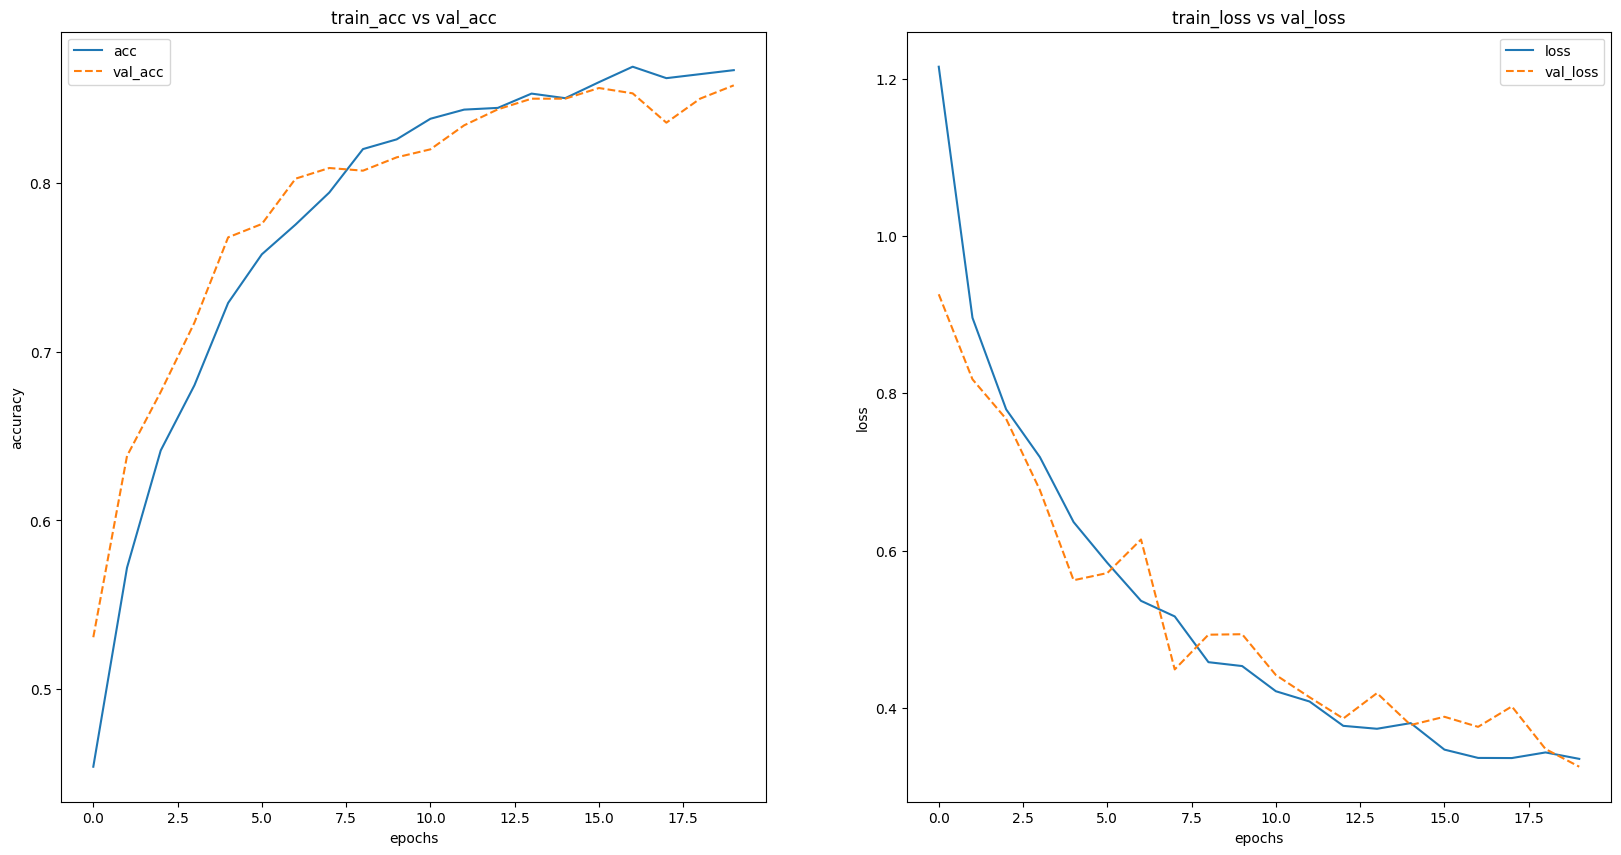

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'],'-', label = "acc")
    plt.plot(history.history['val_accuracy'], '--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(122)
    plt.plot(history.history['loss'],'-', label = "loss")
    plt.plot(history.history['val_loss'], '--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
plot_accuracy_loss(history)

In [ ]:
model = keras.models.load_model('best_model.h5')
predictions = model.predict(test_generator)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step


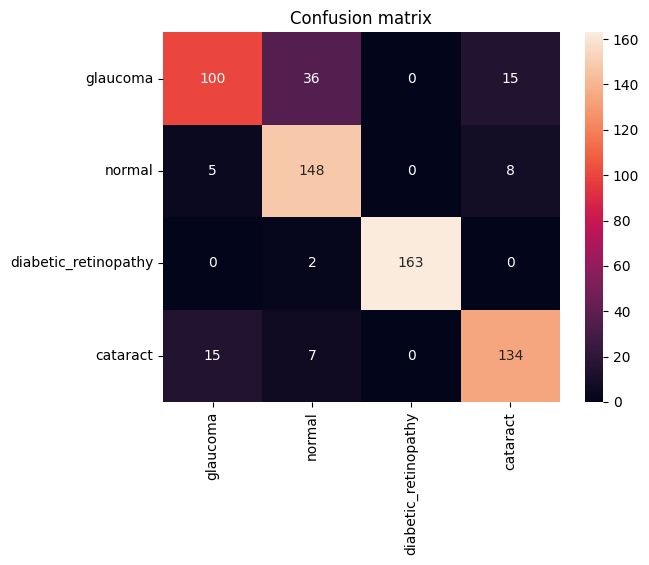

In [ ]:
CM = confusion_matrix(Test_Labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels = Class_Names,
           yticklabels = Class_Names,
           ax = ax,
           fmt='d')
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
print(classification_report(Test_Labels, pred_labels,target_names = Class_Names))

                      precision    recall  f1-score   support

            glaucoma       0.83      0.66      0.74       151
              normal       0.77      0.92      0.84       161
diabetic_retinopathy       1.00      0.99      0.99       165
            cataract       0.85      0.86      0.86       156

            accuracy                           0.86       633
           macro avg       0.86      0.86      0.86       633
        weighted avg       0.86      0.86      0.86       633



<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Predicting with Custom CNN</h2>
</div>

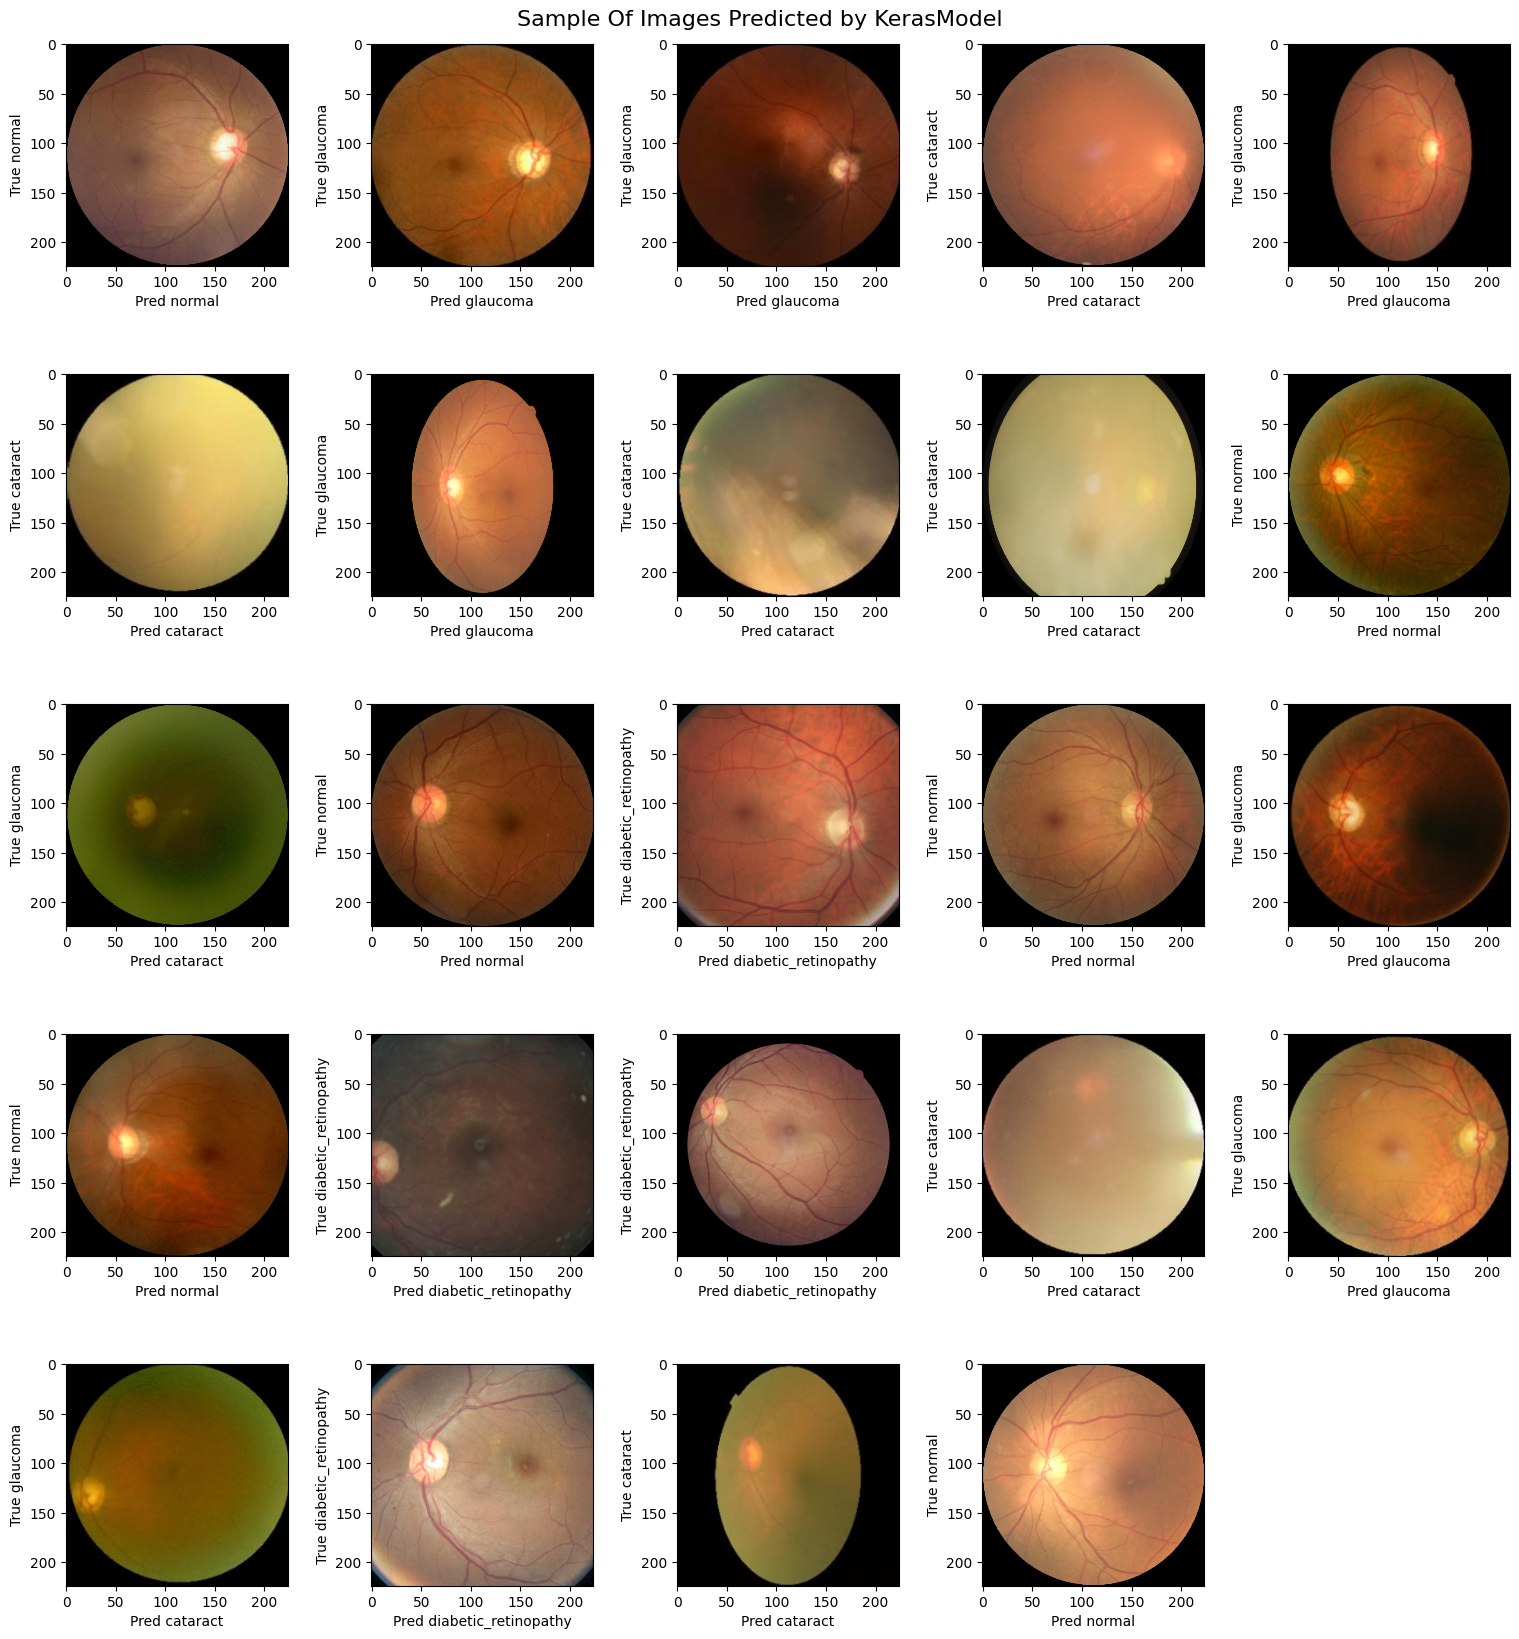

In [ ]:
plt.figure(figsize=(15,20))
plt.suptitle(f"Sample Of Images Predicted by KerasModel" , fontsize=16)

for i in range(24):
    plt.subplot(6,5,i+1)
    idx = np.random.choice(np.arange(len(pred_labels)))
    plt.imshow(Test_Images[idx] / 255.0)
    plt.xlabel(f'Pred {Class_Names[pred_labels[idx]]}')
    plt.ylabel(f'True {Class_Names[Test_Labels[idx]]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=2)

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Pretrained Modeling</h2>
</div>

#### Transfer Learning

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   )

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)

train_generator = train_datagen.flow(x=Train_Images,
    y=Train_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

val_generator = val_datagen.flow(x=Val_Images,
    y=Val_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_generator = test_datagen.flow(x=Test_Images,
    y=Test_Labels,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

In [ ]:
from tensorflow.keras.applications import EfficientNetB7

# Load pre-trained VGG19 model (without top layers)
base_model = EfficientNetB7(weights='imagenet',
                   include_top=False,
                   input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], CHANNELS))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build custom top layers
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
outputs = keras.layers.Dense(4, activation='softmax')(x)

# Define the final model
model_EfficientNetB7 = keras.Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model_EfficientNetB7.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

best_model_callback = keras.callbacks.ModelCheckpoint('model_EfficientNetB7.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history_model_EfficientNetB7 = model_EfficientNetB7.fit(
   train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[
        early_stopping_callback,
        best_model_callback,
    ])


258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.6734 - loss: 0.8087

93/93 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.6741 - loss: 0.8072 - val_accuracy: 0.7378 - val_loss: 0.6756
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 46s 492ms/step - accuracy: 0.8104 - loss: 0.4819 - val_accuracy: 0.7156 - val_loss: 0.6992
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8143 - loss: 0.4537

93/93 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.8143 - loss: 0.4535 - val_accuracy: 0.8120 - val_loss: 0.4606
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.8660 - loss: 0.3753

93/93 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8659 - loss: 0.3755 - val_accuracy: 0.8088 - val_loss: 0.4366
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 48s 509ms/step - accuracy: 0.8577 - loss: 0.3567 - val_accuracy: 0.7504 - val_loss: 0.7080
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 46s 493ms/step - accuracy: 0.8647 - loss: 0.3482 - val_accuracy: 0.8199 - val_loss: 0.4409
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 46s 494ms/step - accuracy: 0.8591 - loss: 0.3619 - val_accuracy: 0.8357 - val_loss: 0.4368
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.8647 - loss: 0.3196

93/93 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.8647 - loss: 0.3196 - val_accuracy: 0.8373 - val_loss: 0.3975
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 47s 503ms/step - accuracy: 0.8788 - loss: 0.2979 - val_accuracy: 0.8325 - val_loss: 0.4351
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8867 - loss: 0.2852

93/93 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.8866 - loss: 0.2854 - val_accuracy: 0.8420 - val_loss: 0.3907
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.8865 - loss: 0.2812

93/93 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8865 - loss: 0.2812 - val_accuracy: 0.8562 - val_loss: 0.3530
Epoch 12/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 47s 500ms/step - accuracy: 0.8819 - loss: 0.2860 - val_accuracy: 0.8389 - val_loss: 0.4393
Epoch 13/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 46s 497ms/step - accuracy: 0.8814 - loss: 0.2940 - val_accuracy: 0.8341 - val_loss: 0.3857
Epoch 14/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 46s 490ms/step - accuracy: 0.8996 - loss: 0.2460 - val_accuracy: 0.8594 - val_loss: 0.3537
Epoch 15/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.9021 - loss: 0.2625

93/93 ━━━━━━━━━━━━━━━━━━━━ 87s 939ms/step - accuracy: 0.9021 - loss: 0.2625 - val_accuracy: 0.8815 - val_loss: 0.3192
Epoch 16/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 46s 490ms/step - accuracy: 0.9088 - loss: 0.2324 - val_accuracy: 0.8626 - val_loss: 0.3349
Epoch 17/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 488ms/step - accuracy: 0.9080 - loss: 0.2213 - val_accuracy: 0.8736 - val_loss: 0.3227
Epoch 18/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 46s 491ms/step - accuracy: 0.9204 - loss: 0.2043 - val_accuracy: 0.8404 - val_loss: 0.4235
Epoch 19/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9115 - loss: 0.2274

93/93 ━━━━━━━━━━━━━━━━━━━━ 90s 977ms/step - accuracy: 0.9115 - loss: 0.2274 - val_accuracy: 0.8736 - val_loss: 0.3177
Epoch 20/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 46s 488ms/step - accuracy: 0.9050 - loss: 0.2144 - val_accuracy: 0.8341 - val_loss: 0.3545


<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Evaluate EfficientNetB7</h2>
</div>

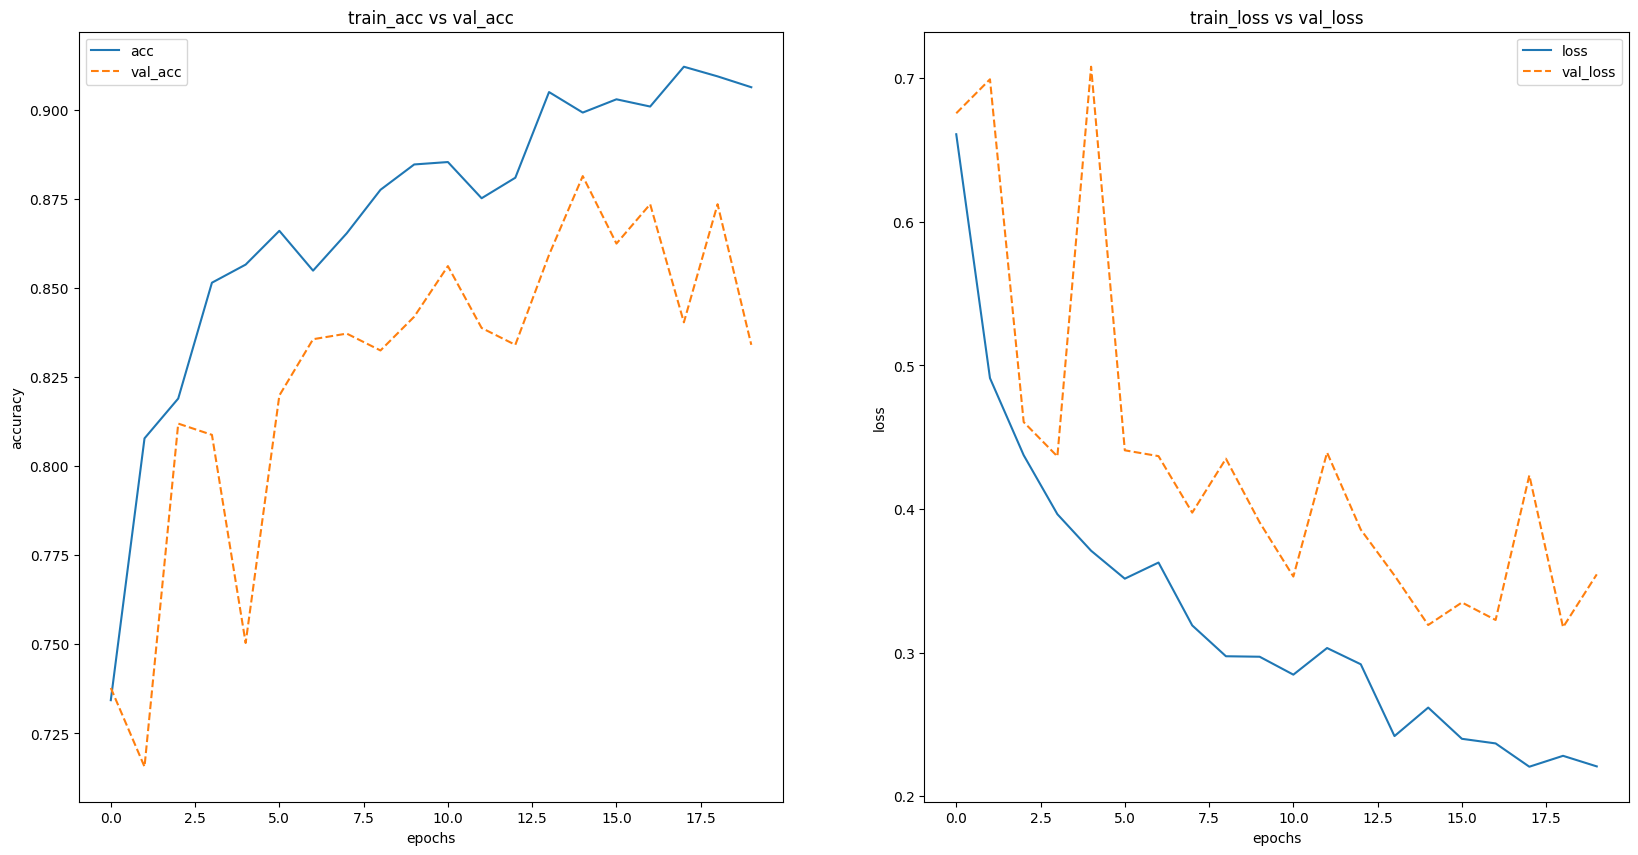

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'],'-', label = "acc")
    plt.plot(history.history['val_accuracy'], '--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(122)
    plt.plot(history.history['loss'],'-', label = "loss")
    plt.plot(history.history['val_loss'], '--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
plot_accuracy_loss(history_model_EfficientNetB7)

In [ ]:
model = keras.models.load_model('model_EfficientNetB7.h5')
predictions = model.predict(test_generator)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step


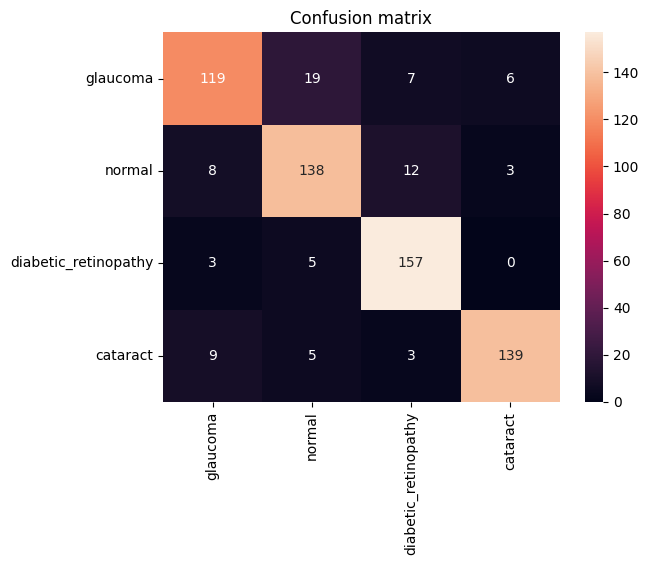

In [ ]:
CM = confusion_matrix(Test_Labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels = Class_Names_Dict.keys(),
           yticklabels = Class_Names_Dict.keys(),
           ax = ax,
           fmt='d')
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
print(classification_report(Test_Labels, pred_labels,target_names = Class_Names_Dict.keys()))

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Predicting with EfficientNetB7</h2>
</div>

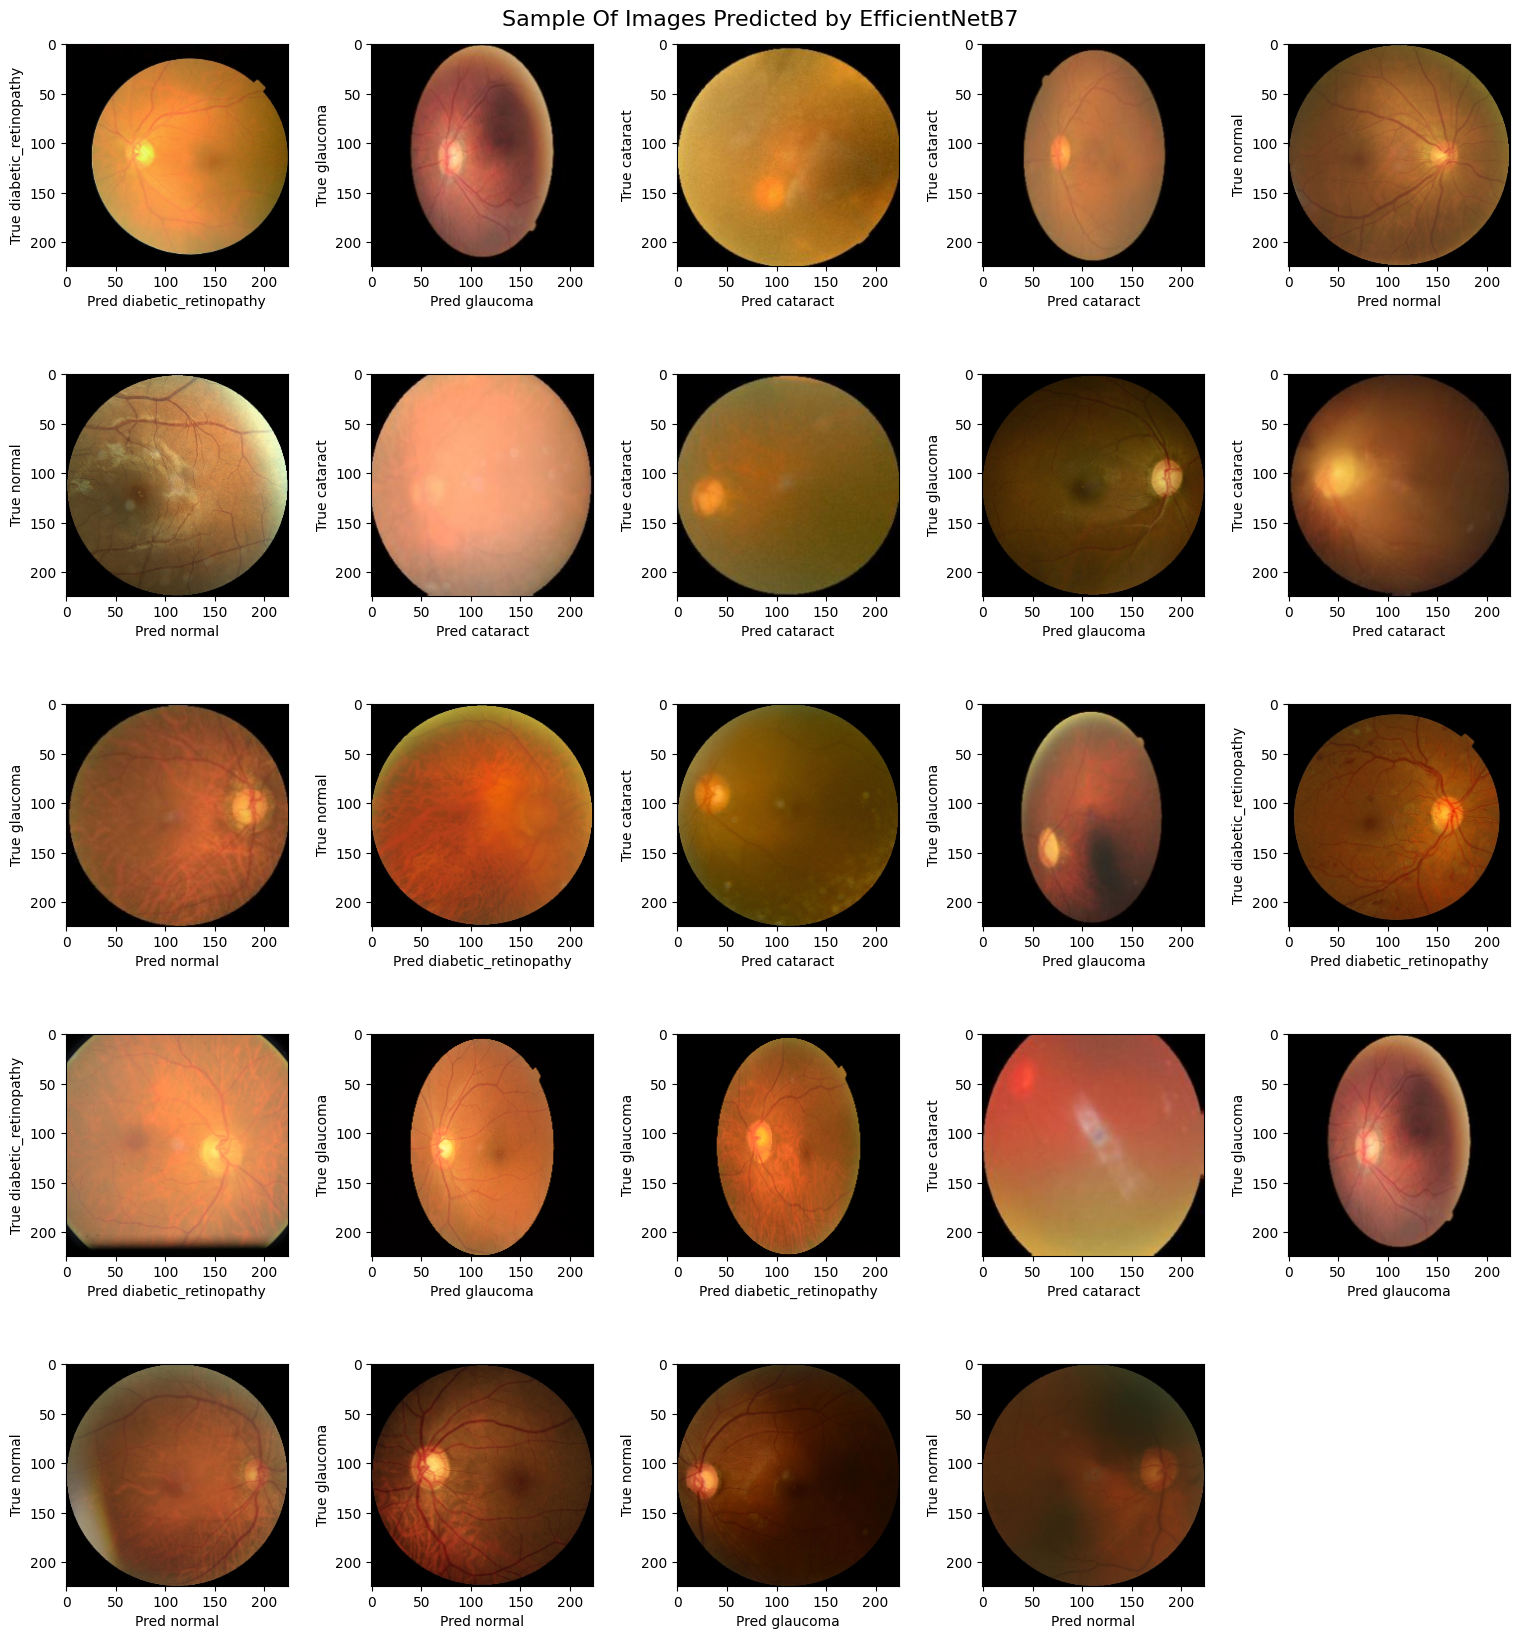

In [ ]:
plt.figure(figsize=(15,20))
plt.suptitle(f"Sample Of Images Predicted by EfficientNetB7" , fontsize=16)

for i in range(24):
    plt.subplot(6,5,i+1)
    idx = np.random.choice(np.arange(len(pred_labels)))
    plt.imshow(Test_Images[idx] / 255.0)
    plt.xlabel(f'Pred {Class_Names[pred_labels[idx]]}')
    plt.ylabel(f'True {Class_Names[Test_Labels[idx]]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=2)